In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


In [2]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.5)
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
data = pd.read_csv("../input/widsdatathon2022/train.csv")
test_data = pd.read_csv("../input/widsdatathon2022/test.csv")

In [4]:
print("Number of train samples are", data.shape)
print("Number of test samples are", test_data.shape)

Number of train samples are (75757, 64)
Number of test samples are (9705, 63)


In [5]:
data.head()


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
data.columns


Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [7]:
data.describe(include="all").T.style

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Factor,75757.000000,nan,nan,nan,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000
State_Factor,75757,7,State_6,50840,nan,nan,nan,nan,nan,nan,nan
building_class,75757,2,Residential,43558,nan,nan,nan,nan,nan,nan,nan
facility_type,75757,60,Multifamily_Uncategorized,39455,nan,nan,nan,nan,nan,nan,nan
floor_area,75757.000000,nan,nan,nan,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6385382.000000
year_built,73920.000000,nan,nan,nan,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2015.000000
energy_star_rating,49048.000000,nan,nan,nan,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,100.000000
ELEVATION,75757.000000,nan,nan,nan,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1924.500000
january_min_temp,75757.000000,nan,nan,nan,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,49.000000
january_avg_temp,75757.000000,nan,nan,nan,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,64.758065


In [8]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
miss_count = data.isna().sum()
miss_df = pd.concat(
    [
        miss_count.rename("Missing count"),
        miss_count.div(len(data)).rename("Missing value"),
    ],
    axis=1,
).loc[miss_count.ne(0)]
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


In [9]:
categorical_cols = [c for c in data.columns if (1 < data[c].nunique()) & (data[c].dtype != np.number) & (data[c].dtype != int)
]
categorical_cols

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """Entry point for launching an IPython kernel.


['State_Factor', 'building_class', 'facility_type']

In [10]:
for col in categorical_cols:
    data[col] = data[col].astype("category")

In [11]:
num_col = data.select_dtypes("number").columns
num_col

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

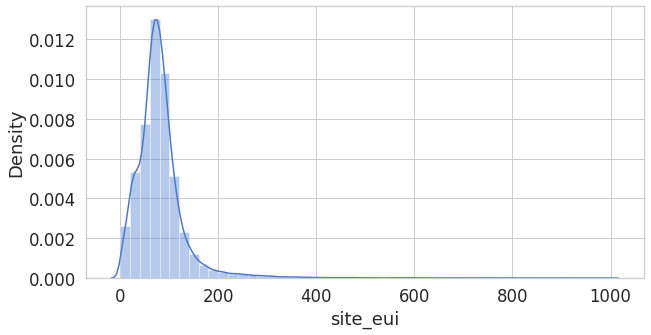

In [12]:
sns.distplot(data["site_eui"])

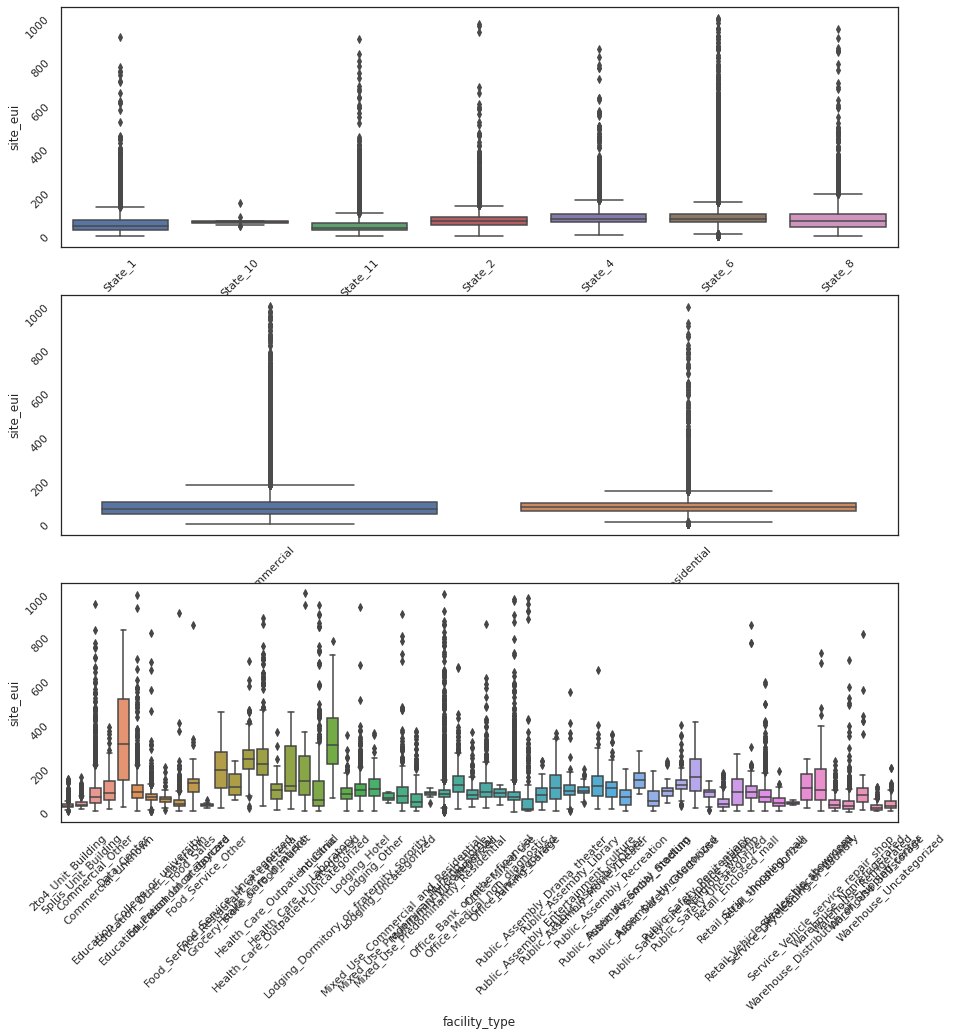

In [13]:
plt.figure(figsize=(15, 15))
sns.set(style="white")
i = 1
for col in categorical_cols:
    plt.subplot(3, 1, i)
    ax = sns.boxplot(data=data, x=col, y="site_eui")
    i = i + 1
    ax.tick_params(labelrotation=45)
plt.show()

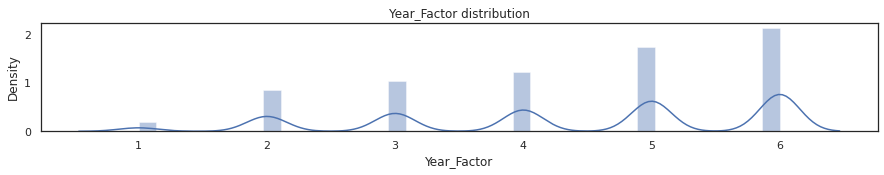

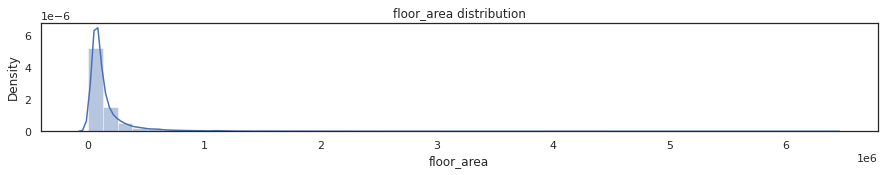

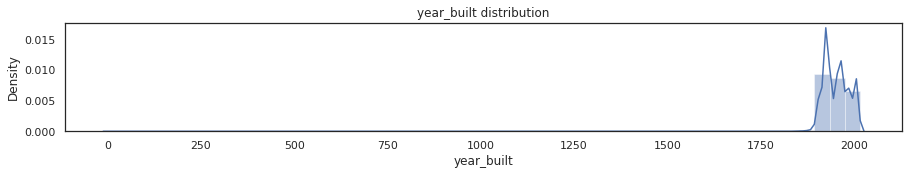

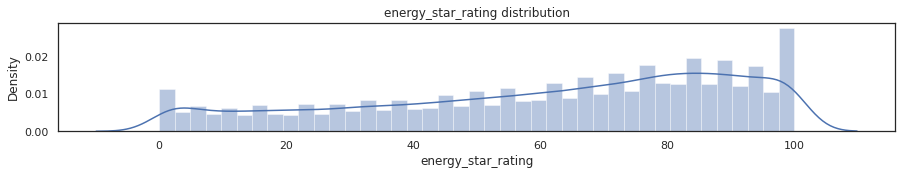

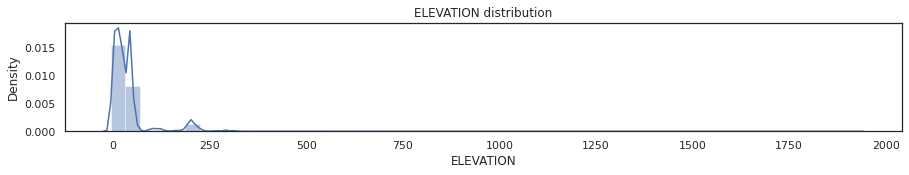

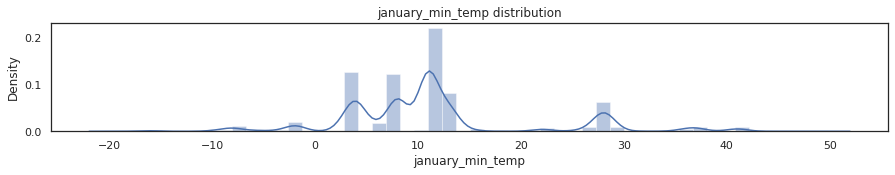

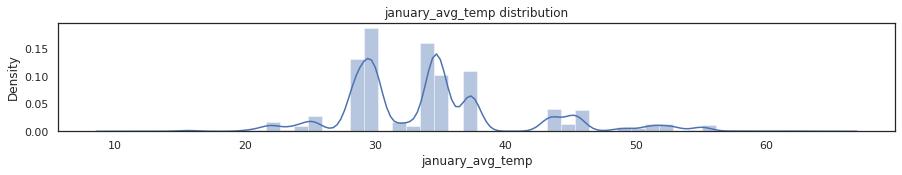

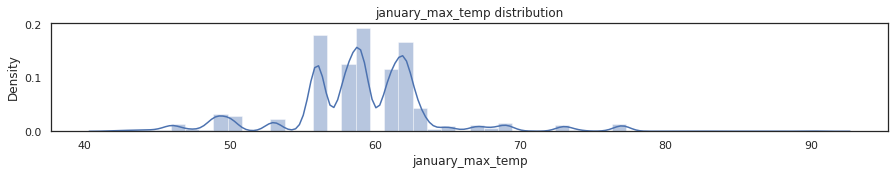

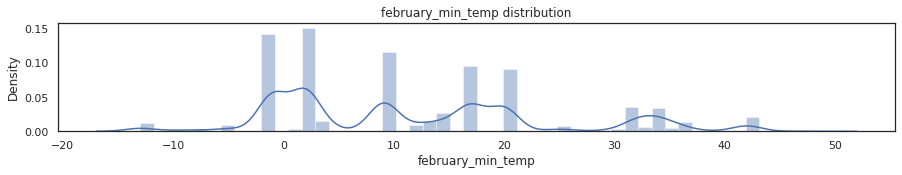

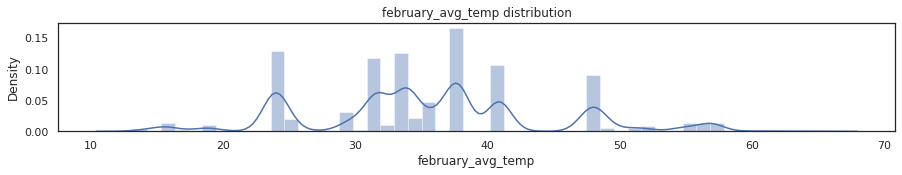

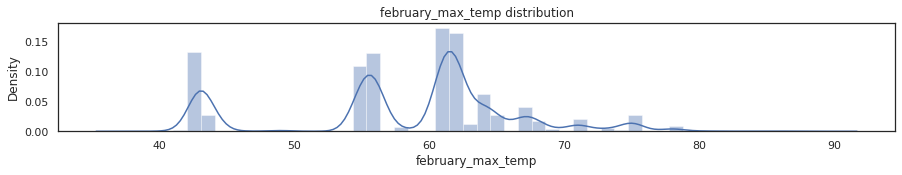

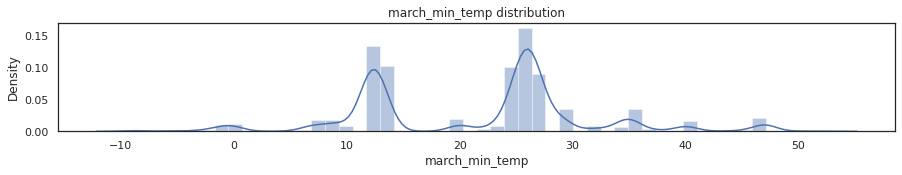

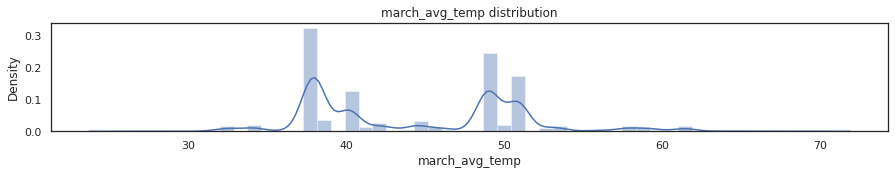

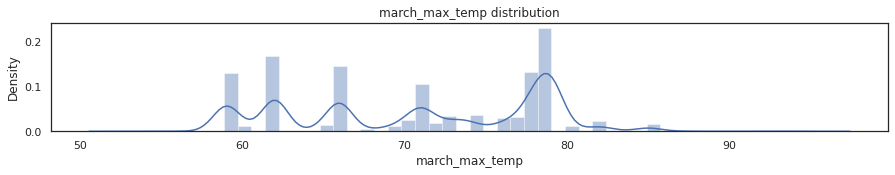

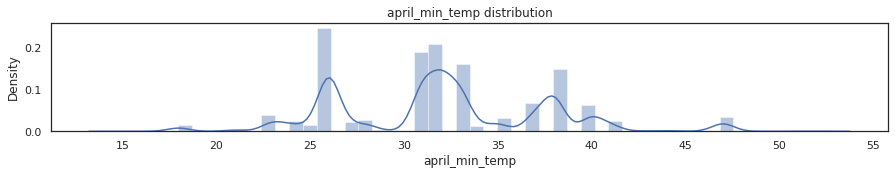

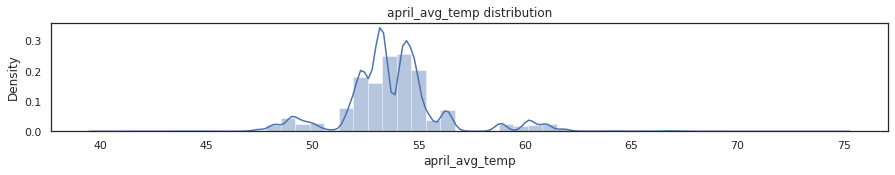

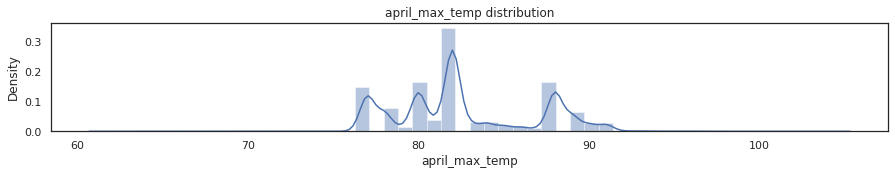

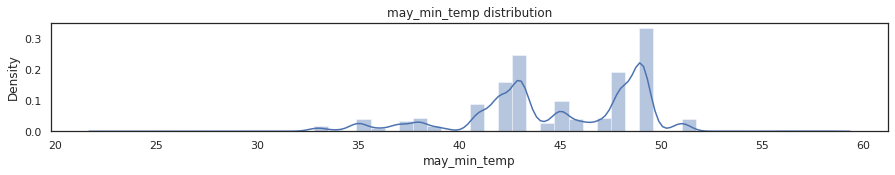

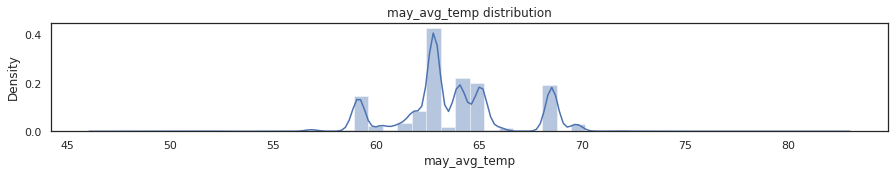

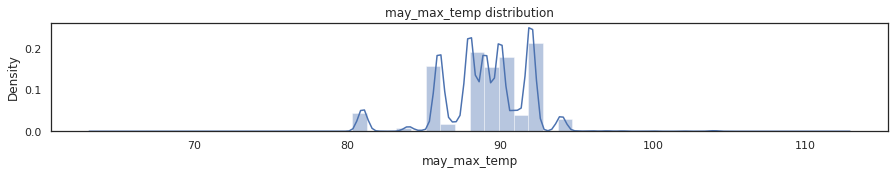

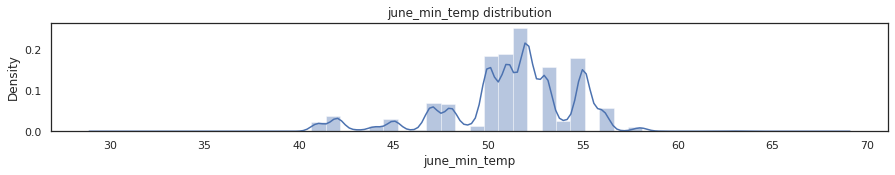

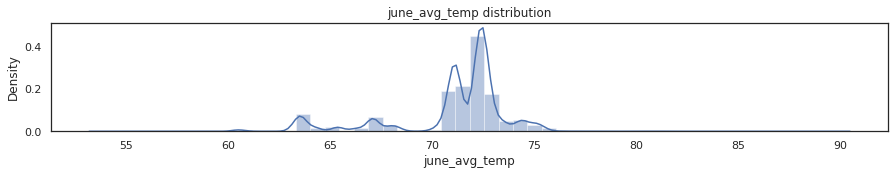

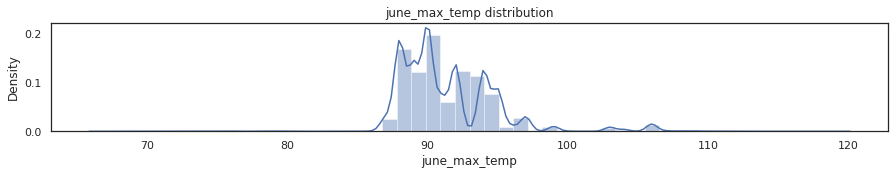

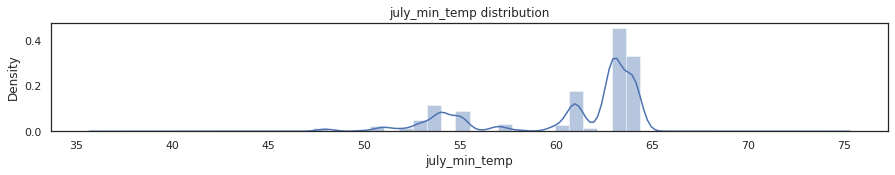

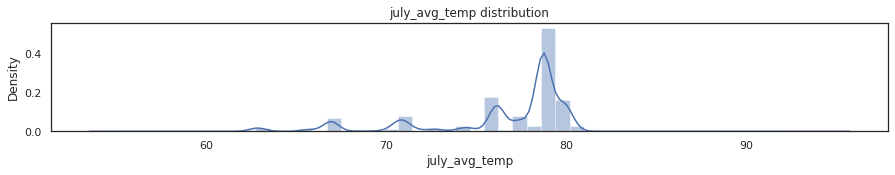

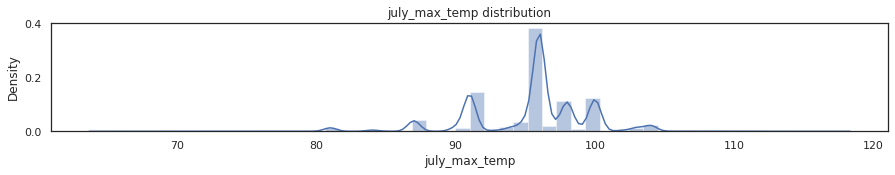

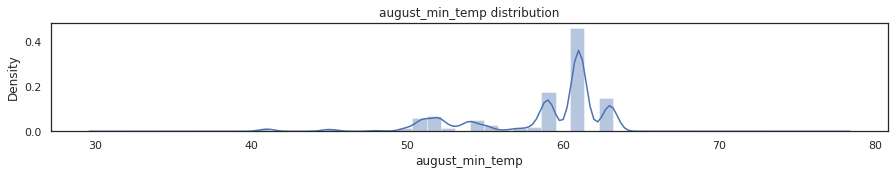

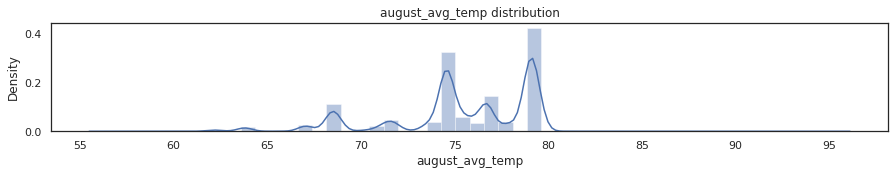

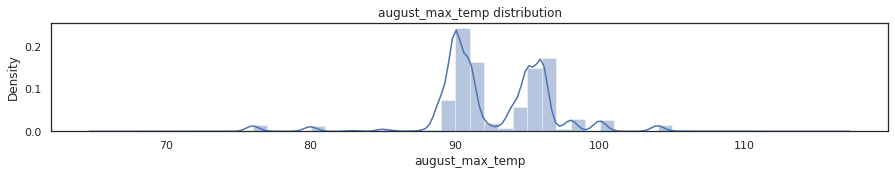

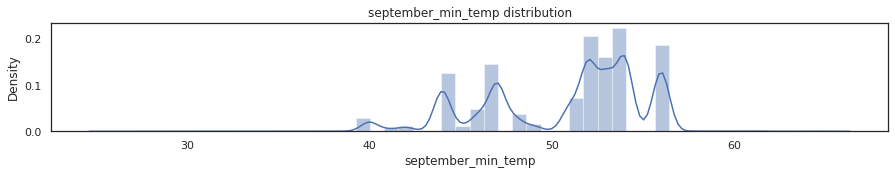

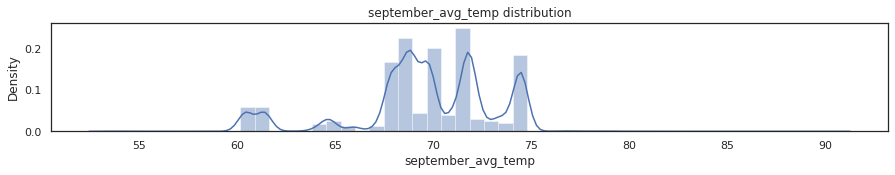

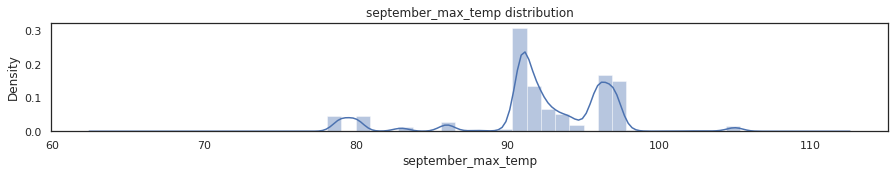

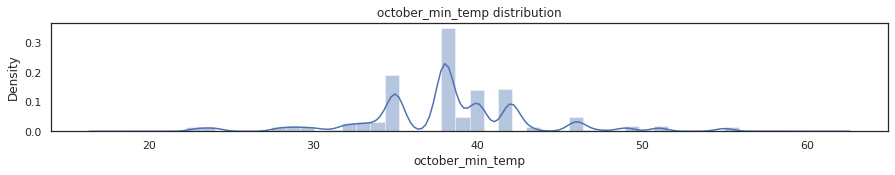

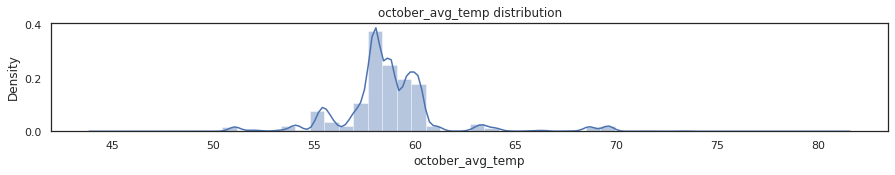

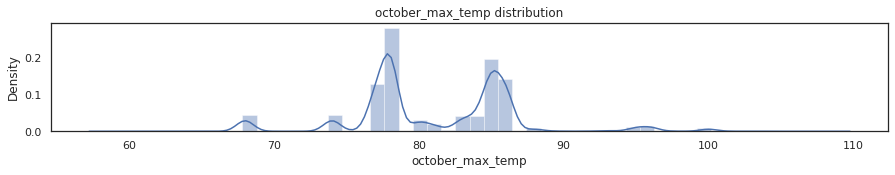

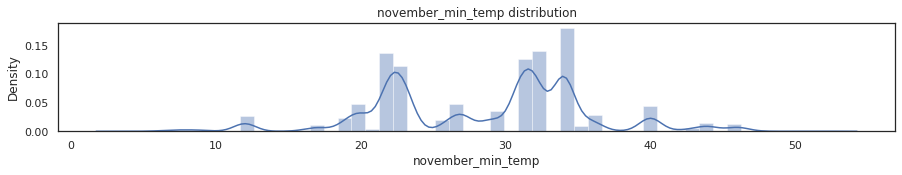

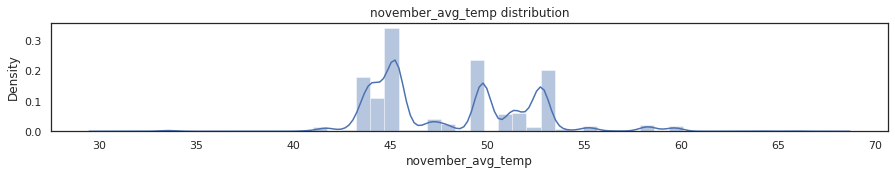

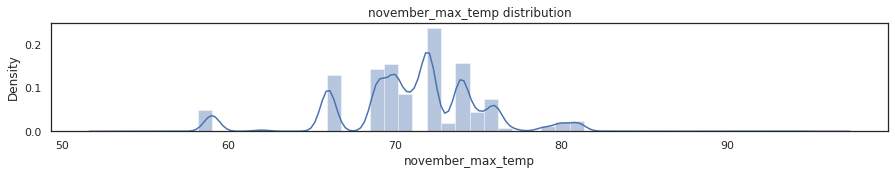

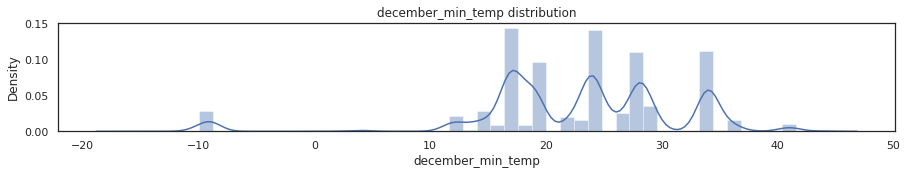

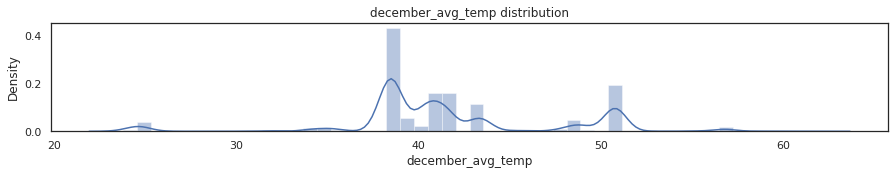

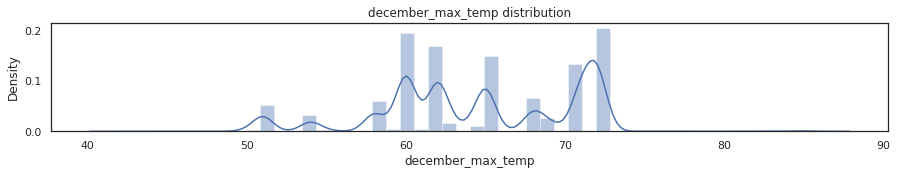

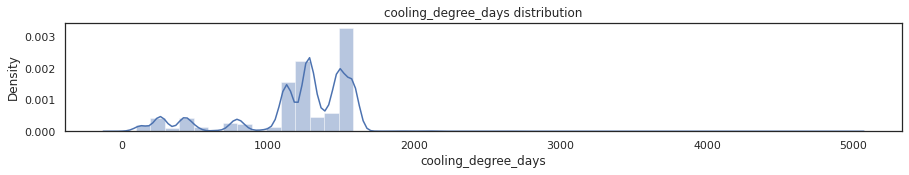

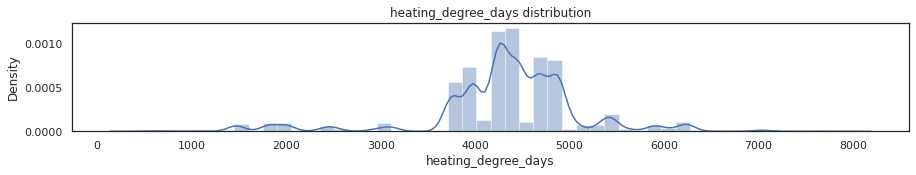

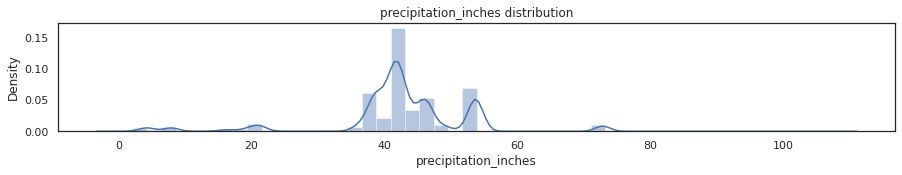

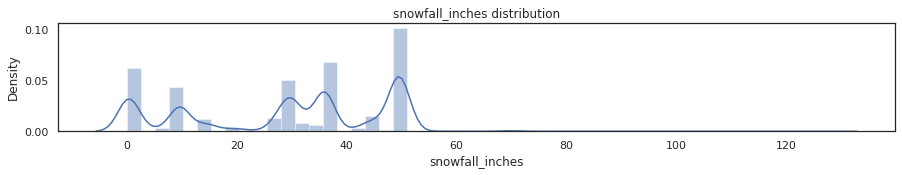

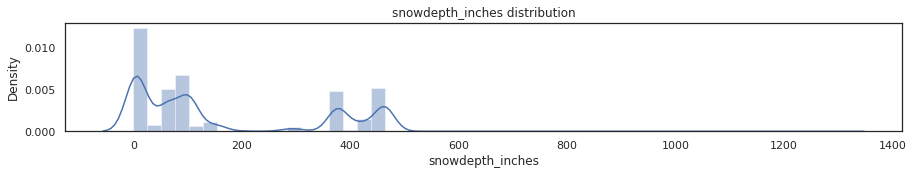

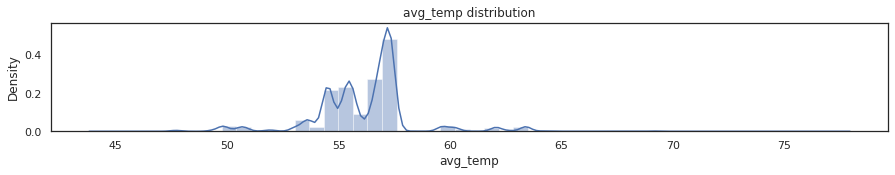

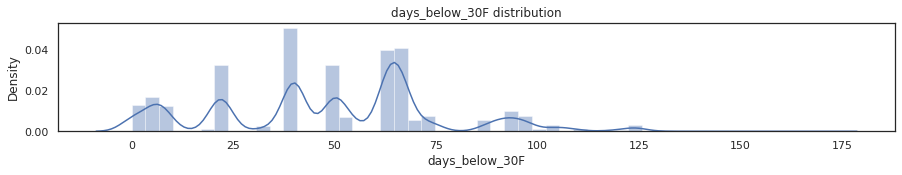

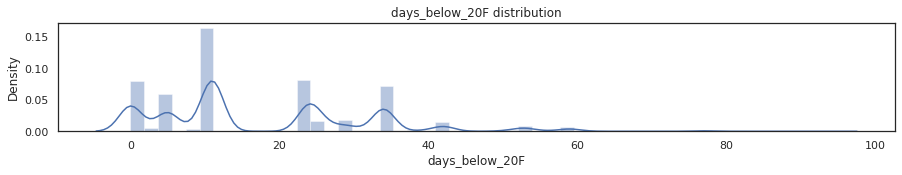

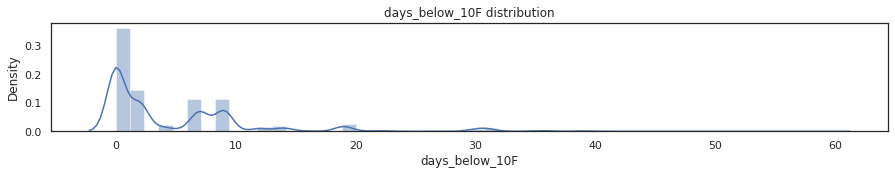

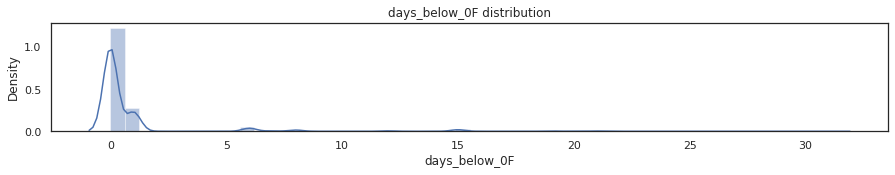

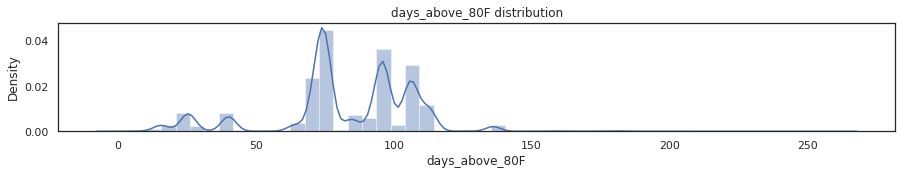

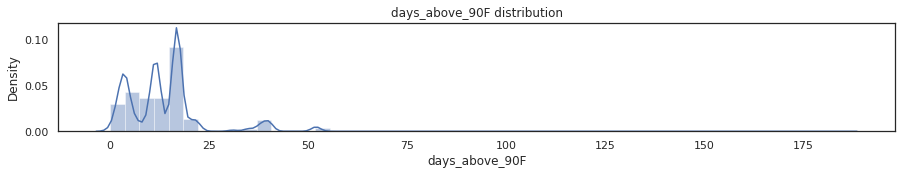

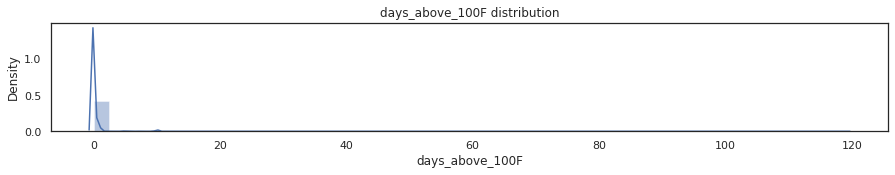

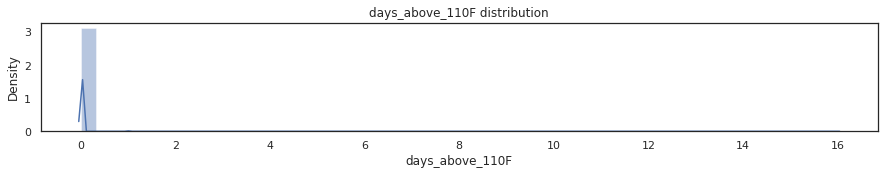

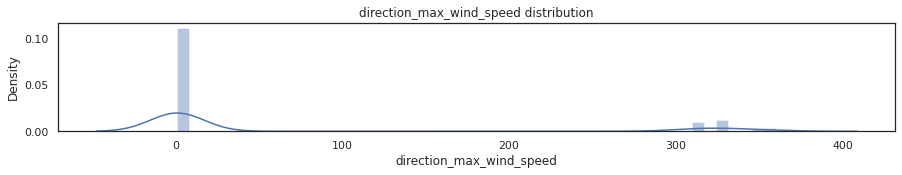

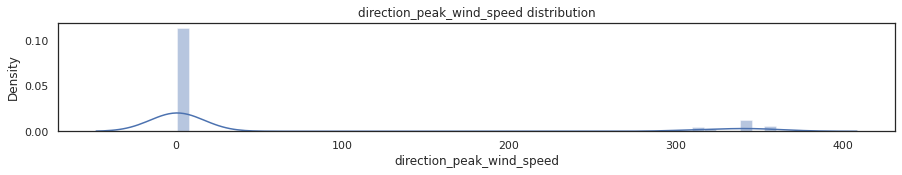

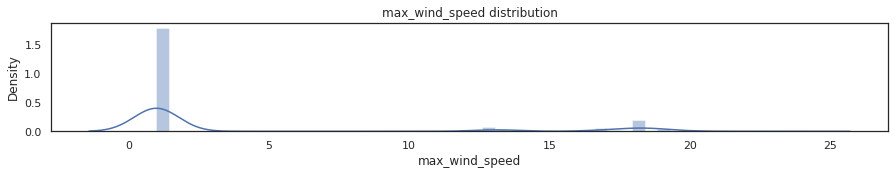

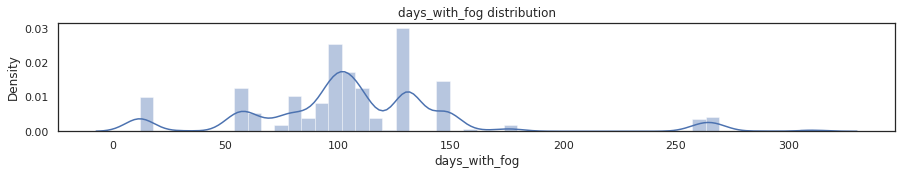

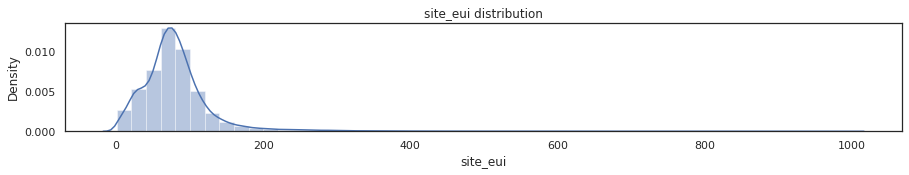

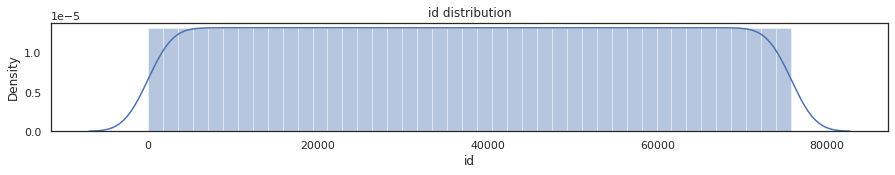

In [14]:
cols = [
    "Year_Factor",
    "floor_area",
    "year_built",
    "energy_star_rating",
    "ELEVATION",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    "days_below_30F",
    "days_below_20F",
    "days_below_10F",
    "days_below_0F",
    "days_above_80F",
    "days_above_90F",
    "days_above_100F",
    "days_above_110F",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

for col in num_col:
    plt.figure(figsize=(15, 2))
    sns.distplot(data[col], kde=True)
    plt.title(col + " distribution")
    plt.show()

In [15]:
if len(data['id'].unique())==len(data):
   print("id values are unique")

id values are unique


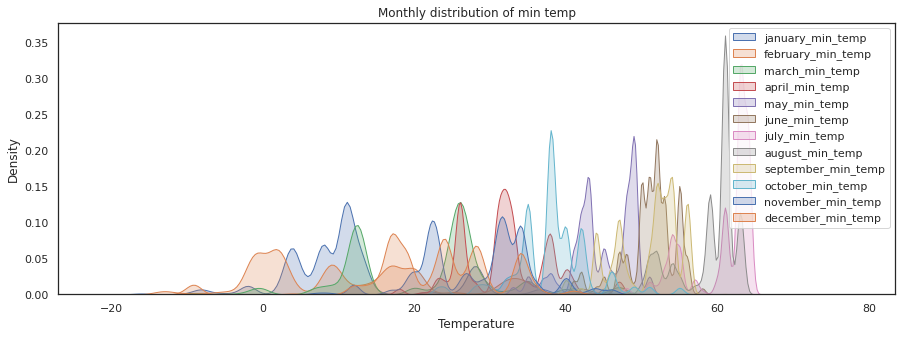

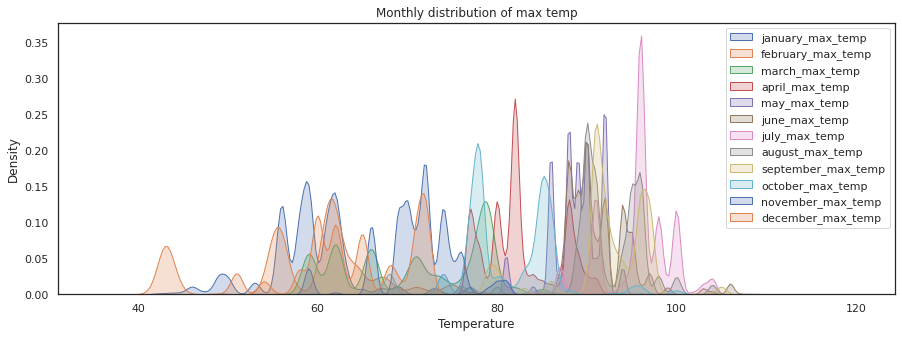

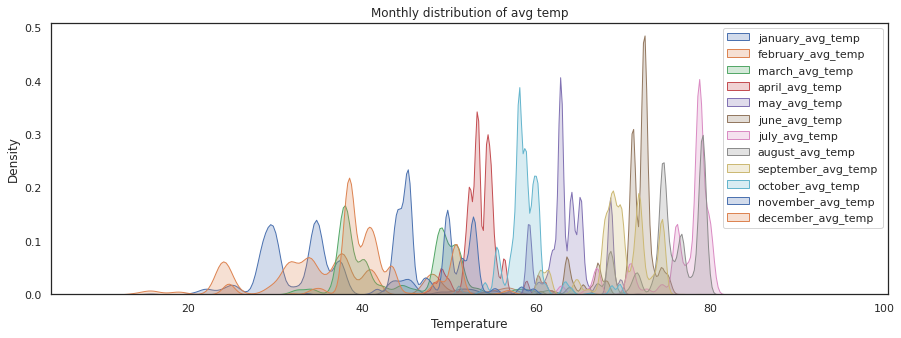

In [16]:
plt.figure(figsize=(15, 5))

min_temp = [
    "january_min_temp",
    "february_min_temp",
    "march_min_temp",
    "april_min_temp",
    "may_min_temp",
    "june_min_temp",
    "july_min_temp",
    "august_min_temp",
    "september_min_temp",
    "october_min_temp",
    "november_min_temp",
    "december_min_temp",
]
for col in min_temp:
    sns.kdeplot(data[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of min temp")
plt.legend(min_temp)

plt.figure(figsize=(15, 5))
max_temp = [
    "january_max_temp",
    "february_max_temp",
    "march_max_temp",
    "april_max_temp",
    "may_max_temp",
    "june_max_temp",
    "july_max_temp",
    "august_max_temp",
    "september_max_temp",
    "october_max_temp",
    "november_max_temp",
    "december_max_temp",
]
for col in max_temp:
    sns.kdeplot(data[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of max temp")
plt.legend(max_temp)

plt.figure(figsize=(15, 5))
avg_temp = [
    "january_avg_temp",
    "february_avg_temp",
    "march_avg_temp",
    "april_avg_temp",
    "may_avg_temp",
    "june_avg_temp",
    "july_avg_temp",
    "august_avg_temp",
    "september_avg_temp",
    "october_avg_temp",
    "november_avg_temp",
    "december_avg_temp",
]
for col in avg_temp:
    sns.kdeplot(data[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of avg temp")
plt.legend(avg_temp)

['january_avg_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'july_avg_temp', 'august_min_temp', 'august_avg_temp', 'september_min_temp', 'september_avg_temp', 'december_avg_temp', 'cooling_degree_days', 'heating_degree_days', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_above_80F', 'direction_peak_wind_speed', 'max_wind_speed']


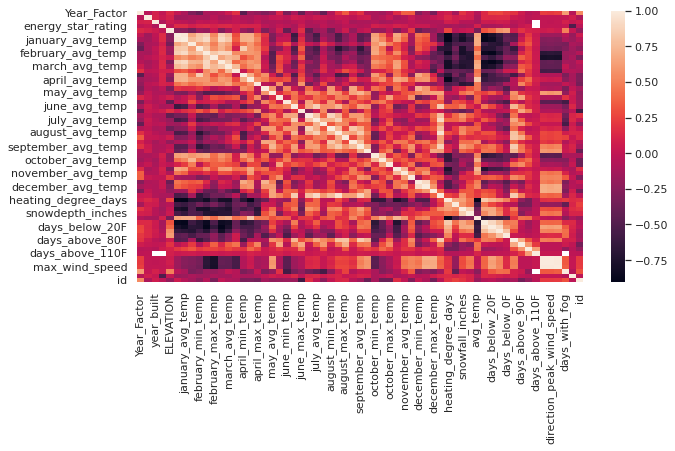

In [17]:
data_cor = data.corr()
sns.heatmap(data_cor)
data_df_upper = data_cor.where(np.triu(np.ones(data_cor.shape, dtype=int), k=1).astype(bool))
cor80 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.8)]

print(cor80)

In [18]:
data["year_built"] = data["year_built"].replace(np.nan, 2022)

## for test data
test_data["year_built"] = test_data["year_built"].replace(np.nan, 2022)

In [19]:
from sklearn.impute import SimpleImputer

null_col = [
    "energy_star_rating",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]
data[null_col].describe()

,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,49048.000000,34675.000000,33946.000000,34675.000000,29961.000000
mean,61.048605,66.552675,62.779974,4.190601,109.142051
std,28.663683,131.147834,130.308106,6.458789,50.699751
min,0.000000,1.000000,1.000000,1.000000,12.000000
25%,40.000000,1.000000,1.000000,1.000000,88.000000
50%,67.000000,1.000000,1.000000,1.000000,104.000000
75%,85.000000,1.000000,1.000000,1.000000,131.000000
max,100.000000,360.000000,360.000000,23.300000,311.000000


In [20]:
imputer = SimpleImputer(strategy='median')
imputer.fit(data[null_col])
data_transformed = imputer.transform(data[null_col])
data[null_col]=pd.DataFrame(data_transformed)
## for test data
test_data_transformed = imputer.transform(test_data[null_col])
test_data[null_col] = pd.DataFrame(test_data_transformed)

In [21]:
data[null_col].describe()


,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,63.146838,31.004343,28.683026,2.460381,106.033621
std,23.238351,94.546574,92.479537,4.649782,31.982643
min,0.000000,1.000000,1.000000,1.000000,12.000000
25%,56.000000,1.000000,1.000000,1.000000,104.000000
50%,67.000000,1.000000,1.000000,1.000000,104.000000
75%,76.000000,1.000000,1.000000,1.000000,104.000000
max,100.000000,360.000000,360.000000,23.300000,311.000000


In [22]:
# rechecking null values
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
cols_with_missing

[]

In [23]:
y = data["site_eui"]
X = data.drop(["site_eui", "id"], axis=1)
ids=test_data.id
test_data.drop(["id"], axis=1, inplace=True)

In [24]:
X.select_dtypes('category')


,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated
...,...,...,...
75752,State_11,Commercial,Office_Uncategorized
75753,State_11,Residential,5plus_Unit_Building
75754,State_11,Commercial,Commercial_Other
75755,State_11,Commercial,Commercial_Other


In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
X_onehot = ohe.fit_transform(X[categorical_cols])
X_onehot = pd.DataFrame(X_onehot.toarray(), columns=ohe.get_feature_names())
X = pd.concat([X.drop(categorical_cols, axis=1), X_onehot], axis=1)
test_data_onehot = ohe.transform(test_data[categorical_cols])
test_data_onehot = pd.DataFrame(
    test_data_onehot.toarray(), columns=ohe.get_feature_names()
)
test_data = pd.concat(
    [test_data.drop(categorical_cols, axis=1), test_data_onehot], axis=1
)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=50
)

In [28]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

baseline_model.fit(X_train, y_train)
y_train_baseline_predict = baseline_model.predict(X_train)
y_test_baseline_predict = baseline_model.predict(X_test)

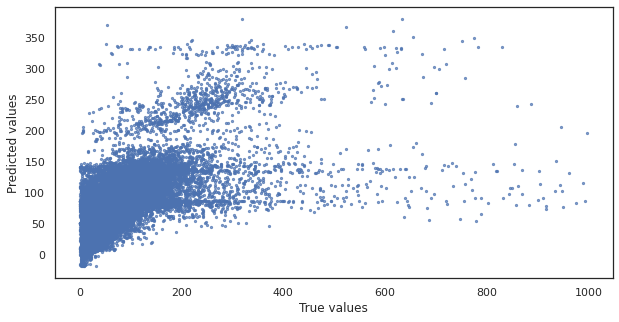

In [29]:
plt.scatter(y_train, y_train_baseline_predict, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

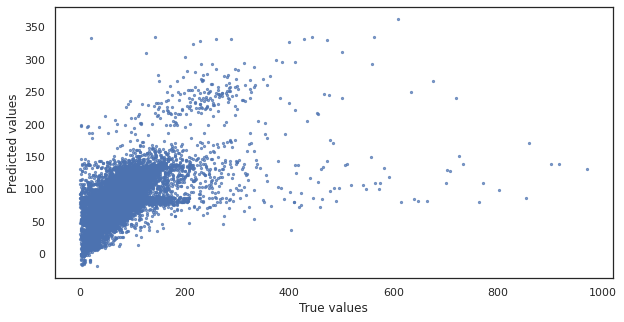

In [30]:
plt.scatter(y_test, y_test_baseline_predict, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_baseline_predict)
test_mse = mean_squared_error(y_test, y_test_baseline_predict)
print(
    f"RMSE on the training data is {np.round(np.sqrt(train_mse), 2)}.",
    f"RMSE on the test data is {np.round(np.sqrt(test_mse), 2)}.",
)

train_r2 = r2_score(y_train, y_train_baseline_predict)
test_r2 = r2_score(y_test, y_test_baseline_predict)
print(
    f"r2 on the training data is {np.round(train_r2, 2)}.",
    f"r2 on the test data is {np.round(test_r2, 2)}.",
)

RMSE on the training data is 47.09. RMSE on the test data is 45.14.
r2 on the training data is 0.36. r2 on the test data is 0.36.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min

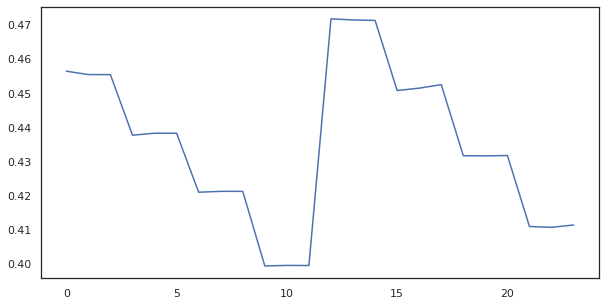

In [32]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm
#https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5
model = lightgbm.LGBMRegressor()

# those are just some example parameters to help you get started!
parameters = {'num_leaves':[140, 200, 300], 'max_depth':[10, 15], 'device' : ['gpu'],
             'learning_rate':[0.05],'reg_lambda':[0.01], 'min_data_in_leaf' : [10, 20, 50, 80]}
model_grid=RandomizedSearchCV(model,parameters,scoring='r2',n_iter=100, cv=5)
model_grid.fit(X_train, y_train)

print(model_grid.best_params_)
plt.plot(model_grid.cv_results_['mean_test_score'])
print(model_grid.best_score_, model_grid.cv_results_['mean_test_score'][0])

In [33]:
model = model_grid.best_estimator_
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [34]:
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print(
    f"RMSE on the training data is {np.round(np.sqrt(train_mse), 2)}.",
    f"RMSE on the test data is {np.round(np.sqrt(test_mse), 2)}.",
)

train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
print(
    f"r2 on the training data is {np.round(train_r2, 2)}.",
    f"r2 on the test data is {np.round(test_r2, 2)}.",
)

RMSE on the training data is 35.56. RMSE on the test data is 40.51.
r2 on the training data is 0.63. r2 on the test data is 0.49.


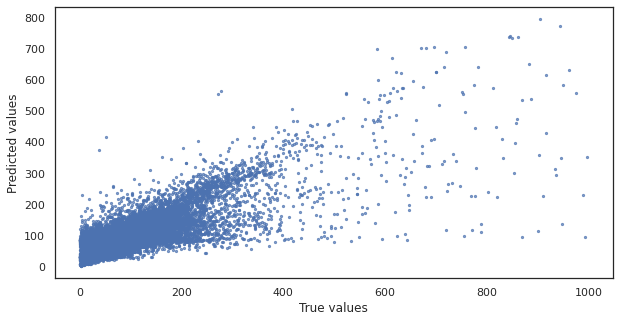

In [35]:
plt.scatter(y_train, y_train_predict, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

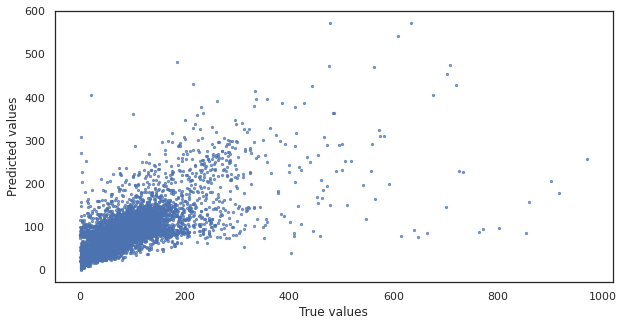

In [36]:
plt.scatter(y_test, y_test_predict, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [37]:
# testdata prediction
prediction = model_grid.best_estimator_.predict(test_scaled)
final=pd.DataFrame({'id': ids, 'site_eui':prediction})
final.head()
final.to_csv('submission.csv', index=False)